In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

import config as cfg

In [2]:
dates_range = [('2023-01-02', '2023-06-23')]
watch_days_range = [2]
hold_days_range = [2]
num_stocks_to_buy_range = [1]
loss_limit_range = [0.999]
fee_range = [0.002]

# dates_range = [('2000-08-01', '2022-12-31'), ('2000-08-02', '2022-12-31'), ('2000-08-03', '2022-12-31'), ('2000-08-04', '2022-12-31'), ('2000-08-05', '2022-12-31'), ('2000-08-06', '2022-12-31'), ('2000-08-07', '2022-12-31'), ('2000-08-08', '2022-12-31'), ('2000-08-09', '2022-12-31')]
# watch_days_range = [3,5]
# hold_days_range = [4,5,8]
# num_stocks_to_buy_range = [1,2]
# loss_limit_range = [0.998, 0.995, 0.99]
# fee_range = [0.002, 0.003, 0.006]

# dates_range = [('2000-08-01', '2022-12-31'), ('2000-08-02', '2022-12-31'), ('2000-08-03', '2022-12-31'), ('2000-08-04', '2022-12-31'), ('2000-08-05', '2022-12-31'), ('2000-08-06', '2022-12-31'), ('2000-08-07', '2022-12-31'), ('2000-08-08', '2022-12-31'), ('2000-08-09', '2022-12-31'), ('2000-08-10', '2022-12-31'), ('2000-08-11', '2022-12-31'), ('2000-08-12', '2022-12-31'), ('2000-08-13', '2022-12-31'), ('2000-08-14', '2022-12-31'),
#                ('2001-01-01', '2001-12-31'), ('2001-01-02', '2001-12-31'), ('2001-01-03', '2001-12-31'), ('2001-01-04', '2001-12-31'), ('2001-01-05', '2001-12-31'),
#                ('2002-01-01', '2002-12-31'), ('2002-01-02', '2002-12-31'), ('2002-01-03', '2002-12-31'), ('2002-01-04', '2002-12-31'), ('2002-01-07', '2002-12-31'),
#                ('2003-01-01', '2003-12-31'), ('2003-01-02', '2003-12-31'), ('2003-01-03', '2003-12-31'), ('2003-01-06', '2003-12-31'), ('2003-01-07', '2003-12-31'),
#                ('2004-01-01', '2004-12-31'), ('2004-01-02', '2004-12-31'), ('2004-01-05', '2004-12-31'), ('2004-01-06', '2004-12-31'), ('2004-01-07', '2004-12-31'),
#                ('2005-01-03', '2005-12-31'), ('2005-01-04', '2005-12-31'), ('2005-01-05', '2005-12-31'), ('2005-01-06', '2005-12-31'), ('2005-01-07', '2005-12-31'),
#                ('2006-01-02', '2006-12-31'), ('2006-01-03', '2006-12-31'), ('2006-01-04', '2006-12-31'), ('2006-01-05', '2006-12-31'), ('2006-01-06', '2006-12-31'),
#                ('2007-01-01', '2007-12-31'), ('2007-01-02', '2007-12-31'), ('2007-01-03', '2007-12-31'), ('2007-01-04', '2007-12-31'), ('2007-01-05', '2007-12-31'),
#                ('2008-01-01', '2008-12-31'), ('2008-01-02', '2008-12-31'), ('2008-01-03', '2008-12-31'), ('2008-01-04', '2008-12-31'), ('2008-01-07', '2008-12-31'),
#                ('2009-01-01', '2009-12-31'), ('2009-01-02', '2009-12-31'), ('2009-01-05', '2009-12-31'), ('2009-01-06', '2009-12-31'), ('2009-01-07', '2009-12-31'),
#                ('2010-01-01', '2010-12-31'), ('2010-01-04', '2010-12-31'), ('2010-01-05', '2010-12-31'), ('2010-01-06', '2010-12-31'), ('2010-01-07', '2010-12-31'),
#                ('2011-01-03', '2011-12-31'), ('2011-01-04', '2011-12-31'), ('2011-01-05', '2011-12-31'), ('2011-01-06', '2011-12-31'), ('2011-01-07', '2011-12-31'),
#                ('2012-01-02', '2012-12-31'), ('2012-01-03', '2012-12-31'), ('2012-01-04', '2012-12-31'), ('2012-01-05', '2012-12-31'), ('2012-01-06', '2012-12-31'),
#                ('2013-01-01', '2013-12-31'), ('2013-01-02', '2013-12-31'), ('2013-01-03', '2013-12-31'), ('2013-01-04', '2013-12-31'), ('2013-01-07', '2013-12-31'),
#                ('2014-01-01', '2014-12-31'), ('2014-01-02', '2014-12-31'), ('2014-01-03', '2014-12-31'), ('2014-01-06', '2014-12-31'), ('2014-01-07', '2014-12-31'),
#                ('2015-01-01', '2015-12-31'), ('2015-01-05', '2015-12-31'), ('2015-01-06', '2015-12-31'), ('2015-01-07', '2015-12-31'), ('2015-01-08', '2015-12-31'),
#                ('2016-01-01', '2016-12-31'), ('2016-01-04', '2016-12-31'), ('2016-01-05', '2016-12-31'), ('2016-01-06', '2016-12-31'), ('2016-01-07', '2016-12-31'),
#                ('2017-01-02', '2017-12-31'), ('2017-01-03', '2017-12-31'), ('2017-01-04', '2017-12-31'), ('2017-01-05', '2017-12-31'), ('2017-01-06', '2017-12-31'),
#                ('2018-01-01', '2018-12-31'), ('2018-01-02', '2018-12-31'), ('2018-01-03', '2018-12-31'), ('2018-01-04', '2018-12-31'), ('2018-01-05', '2018-12-31'),
#                ('2019-01-01', '2019-12-31'), ('2019-01-02', '2019-12-31'), ('2019-01-03', '2019-12-31'), ('2019-01-04', '2019-12-31'), ('2019-01-07', '2019-12-31'),
#                ('2020-01-01', '2020-12-31'), ('2020-01-02', '2020-12-31'), ('2020-01-03', '2020-12-31'), ('2020-01-06', '2020-12-31'), ('2020-01-07', '2020-12-31'),
#                ('2021-01-01', '2021-12-31'), ('2021-01-04', '2021-12-31'), ('2021-01-05', '2021-12-31'), ('2021-01-06', '2021-12-31'), ('2021-01-07', '2021-12-31'),
#                ('2022-01-03', '2022-12-31'), ('2022-01-04', '2022-12-31'), ('2022-01-05', '2022-12-31'), ('2022-01-06', '2022-12-31'), ('2022-01-07', '2022-12-31'),
#                ('2023-01-02', '2023-06-23'), ('2023-01-03', '2023-06-23'), ('2023-01-04', '2023-06-23'), ('2023-01-05', '2023-12-23'), ('2023-01-06', '2023-12-23'),]
# watch_days_range = [1,2,3,4,5,6,7]
# hold_days_range = [1,2,3,4,5,6,7,10]
# num_stocks_to_buy_range = [1,2]
# loss_limit_range = [0.999,0.998,0.997]
# fee_range = [0.002, 0.003, 0.006]
nlargest_nsmallest = 'nsmallest'

num_tickers = len(cfg.selected_tickers)

num_combinations = len(dates_range) * len(watch_days_range) * len(hold_days_range) * len(num_stocks_to_buy_range) * len(loss_limit_range) * len(fee_range)
combinations_per_minute = 10

print(f"Number of combinations: {num_combinations}, Estimated time: {(num_combinations / combinations_per_minute):.2f} minutes")

Number of combinations: 1, Estimated time: 0.10 minutes


In [3]:
def get_number_of_years(start_date, end_date):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    delta = end - start
    return delta.days / 365.25

In [4]:
def download_stock_data(start_date, end_date):
    stock_data = yf.download(cfg.selected_tickers, start=start_date, end=end_date)

    df = pd.DataFrame(stock_data)
    df = df.sort_values("Date") # stock_data is not ordered by default
    
    close_df = df[["Close"]]
    close_df.columns = close_df.columns.droplevel(0) # Convert to single level columns
    
    low_df = df[["Low"]]
    low_df.columns = low_df.columns.droplevel(0)

    if close_df.shape == low_df.shape:
        print("OK: close_df and low_df have the same size")
    else:
        print("Error: close_df and low_df have different sizes")

    return close_df, low_df

In [5]:
def get_top_stocks(price_increase, num_stocks_to_buy):
    if nlargest_nsmallest == 'nlargest':
        top_stocks = price_increase.squeeze().nlargest(num_stocks_to_buy).index # Select the num_stocks_to_buy stocks with the highest price increase
    elif nlargest_nsmallest == 'nsmallest':
        top_stocks = price_increase.squeeze().nsmallest(num_stocks_to_buy).index
    else:
        print('Error: nlargest_nsmallest value is unknown')

    # top_stocks1 = price_increase.squeeze().nlargest(num_stocks_to_buy).index
    # top_stocks2 = price_increase.squeeze().nsmallest(num_stocks_to_buy).index
    # top_stocks = top_stocks1.union(top_stocks2)
    # top_stocks = top_stocks.dropna()

    return top_stocks

In [6]:
def calculate_profit(close_df, low_df, buy_day_number, sell_day_number, top_stocks, loss_limit, fee):
    buy_prices = close_df.loc[close_df.index[buy_day_number], top_stocks] # Calculate the buying prices at the start of the hold period
    buy_prices = buy_prices.sort_index(axis=0)

    hold_prices = close_df.loc[close_df.index[sell_day_number], top_stocks] # Calculate the selling prices after watch_days + hold_days days
    hold_prices = hold_prices.sort_index(axis=0)

    limit_prices = loss_limit * buy_prices

    min_prices = low_df.iloc[buy_day_number+1:sell_day_number+1].min() # Calculate the minimum price in the holding period
    min_prices = min_prices.loc[min_prices.index.intersection(top_stocks)]
    min_prices = min_prices.sort_index(axis=0)
    
    condition = min_prices < limit_prices

    sell_prices = hold_prices.copy()
    sell_prices[condition] = limit_prices[condition]

    profits = (sell_prices * (1 - fee)) / (buy_prices * (1 + fee))
    profits = profits.dropna()

    if num_combinations == 1:
        print(f'buy_price: {buy_prices}, sell_prices: {sell_prices}')

    profit = profits.mean(skipna=True) # Calculate the average of profits of the selected stocks

    return profit

In [7]:
def plot_profits(profits_list, total_profits_list):
    mpl.rcParams['figure.figsize'] = [20, 15]
    mpl.rcParams['axes.grid'] = True

    plt.plot(profits_list)
    plt.title('profit vs iteration')
    plt.show()

    plt.plot(total_profits_list)
    plt.title('total profit vs iteration')
    plt.show()
    # plt.plot(total_profits[:200])
    # plt.show()

In [8]:
def get_win_ratio(profits):
    count = sum(1 for num in profits if num > 1)
    win_ratio = count / len(profits)
    return round(win_ratio, 2)

In [9]:
def get_results():
    results = []
    combination_index = 0

    for start_date, end_date in dates_range:
        close_df, low_df = download_stock_data(start_date, end_date)
        years = get_number_of_years(start_date, end_date)

        for watch_days in watch_days_range:
            for hold_days in hold_days_range:
                num_iterations = int(len(close_df) / (watch_days + hold_days)) - 1

                for num_stocks_to_buy in num_stocks_to_buy_range:  # num_stocks_to_buy represents the number of stocks to buy
                    for loss_limit in loss_limit_range:  # loss_limit represents the percentage decrease threshold for selling
                        for fee in fee_range:
                            total_profit = 1
                            profits_list = []
                            total_profits_list = []

                            for i in range(num_iterations):
                                start_watch_day_number = i * (watch_days + hold_days)
                                buy_day_number = start_watch_day_number + watch_days
                                sell_day_number = buy_day_number + hold_days

                                price_increase = close_df[start_watch_day_number:buy_day_number].pct_change(watch_days - 1).tail(1) # Calculate the price increase in the last watch_days days for each stock

                                if len(price_increase.columns) >= num_stocks_to_buy:
                                    top_stocks = get_top_stocks(price_increase, num_stocks_to_buy)
                                    profit = calculate_profit(close_df, low_df, buy_day_number, sell_day_number, top_stocks, loss_limit, fee)
                                    total_profit *= profit if np.isfinite(profit) else 1
                                    yearly_profit = pow(total_profit, 1 / years)
                                    
                                    profits_list.append(profit)
                                    total_profits_list.append(total_profit)
                                    # mean_price_increases.append(price_increase.mean(axis=1))
                                    # median_price_increases.append(price_increase.median(axis=1))
                                    # all_profits.append(profit)

                                    if num_combinations == 1:
                                        print(f'buy_day_number: {buy_day_number}, sell_day_number: {sell_day_number}, top_stock: {top_stocks}, profit: {profit}')

                            win_ratio = get_win_ratio(profits_list)
                        
                            results.append({'date_range': f'{start_date}/{end_date}',
                                            'watch_days': watch_days, 'hold_days': hold_days,
                                            'num_stocks_to_buy': num_stocks_to_buy,
                                            'loss_limit': loss_limit,
                                            'fee': fee,
                                            'num_tickers': num_tickers,
                                            'nlargest_nsmallest': nlargest_nsmallest,
                                            'total_profit': round(total_profit, 5),
                                            'yearly_profit': round(yearly_profit, 5),
                                            'win_ratio': win_ratio})

                            print(f"Combination: {combination_index + 1} / {num_combinations}")
                            combination_index += 1

    if num_combinations == 1:
        plot_profits(profits_list, total_profits_list)
    
    return results

[*********************100%***********************]  1252 of 1252 completed

43 Failed downloads:
- KOMP.OL: No data found, symbol may be delisted
- ALDEI.PA: No data found, symbol may be delisted
- BELR.BR: No data found, symbol may be delisted
- ALADV.PA: No data found, symbol may be delisted
- HEGAW.AS: No data found, symbol may be delisted
- ALHIO.PA: No data found, symbol may be delisted
- GALQ.MC: No data found, symbol may be delisted
- DMSIM.PA: No data found, symbol may be delisted
- AED.MI: No data found, symbol may be delisted
- BIOS.PA: No data found, symbol may be delisted
- SAS.CO: No data found for this date range, symbol may be delisted
- PHXM.PA: Data doesn't exist for startDate = 1672614000, endDate = 1687471200
- SX.PA: No data found, symbol may be delisted
- PFE.ST: No data found, symbol may be delisted
- FKR.MI: No data found, symbol may be delisted
- BLVIS-A.CO: No data found, symbol may be delisted
- AF.MI: No data found, symbol may be delisted
- HSHIP.OL: No data 

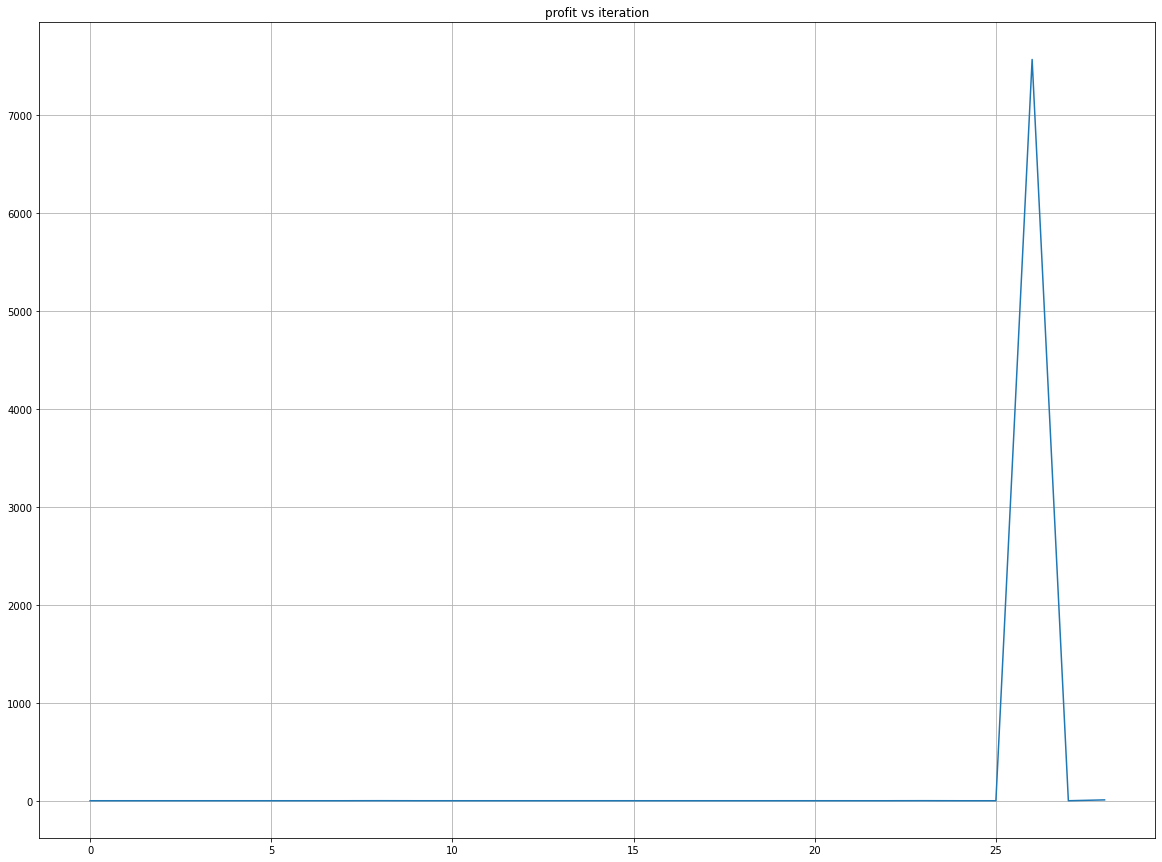

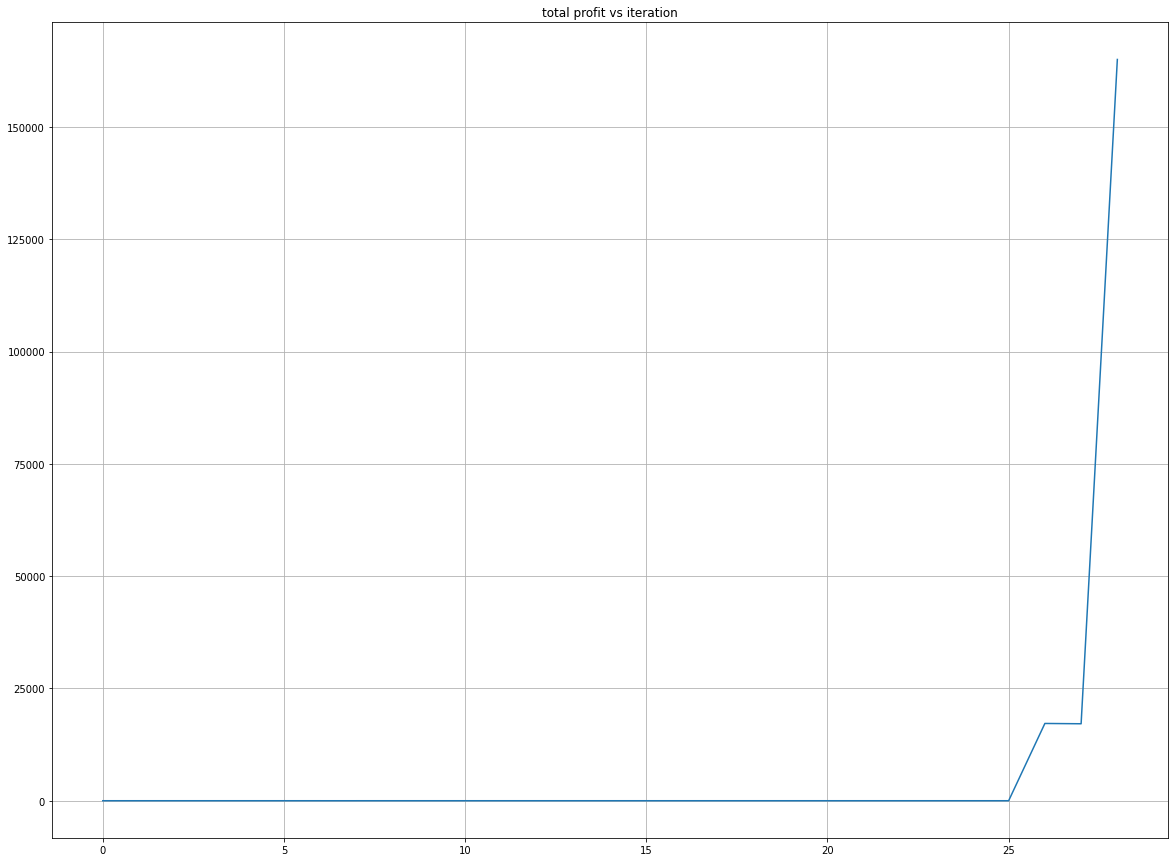

In [10]:
results_df = pd.DataFrame(get_results())
results_df.sort_values("yearly_profit", ascending=False, inplace=True)

formatted_datetime = datetime.now().strftime("%Y-%m-%d_%Hh%Mm%Ss")

results_df.to_csv(f'./outputs/{nlargest_nsmallest}_{formatted_datetime}.csv', index=False)
